In [1]:
import os
import sys
import pandas as pd
from scipy import sparse
from sklearn.decomposition import NMF, LatentDirichletAllocation

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import mmread
script_dir = "../"
sys.path.append(os.path.abspath(script_dir))
from file2 import *
from factorize import *
from smallsim_functions_anchor import *
from misc import *


np.random.seed(123)

In [2]:
datafile="../dataset/sla_simulated/sla_simulated_fastTopics_k6_1.mtx"
Lfile="../dataset/sla_simulated/sla_simulated_fastTopics_k6_1_trueL.csv"
Ffile="../dataset/sla_simulated/sla_simulated_fastTopics_k6_1_trueF.csv"

L = np.genfromtxt(Lfile)
F = np.genfromtxt(Ffile)
X = mmread(datafile)
k = F.shape[1]

In [3]:
Bows = X2Bows(X)
C, D1, D2 = bows2C(Bows, min_tokens=0)

[file.bows2C] Start constructing dense C...
- Counting the co-occurrence for each document...
+ Finish constructing C and D!
  - The sum of all entries = 163.084746
  - Elapsed Time = 2.9429 seconds


In [4]:
S, B, A, Btilde, Cbar, C_rowSums, diagR, C = factorizeC(C, K=k, rectifier='AP', optimizer='activeSet')

+ Start rectifying C...
+ Start alternating projection
  - 1-th iteration... (6.443456e-02 / 2.075908e-03)
  - 2-th iteration... (3.777255e-06 / 2.075908e-03)
  - 3-th iteration... (3.787366e-06 / 2.075908e-03)
  - 4-th iteration... (3.797450e-06 / 2.075908e-03)
  - 5-th iteration... (3.807504e-06 / 2.075908e-03)
  - 6-th iteration... (3.817529e-06 / 2.075908e-03)
  - 7-th iteration... (3.827523e-06 / 2.075909e-03)
  - 8-th iteration... (3.837486e-06 / 2.075909e-03)
  - 9-th iteration... (3.847416e-06 / 2.075909e-03)
  - 10-th iteration... (3.857312e-06 / 2.075909e-03)
  - 11-th iteration... (3.867174e-06 / 2.075909e-03)
  - 12-th iteration... (3.877000e-06 / 2.075909e-03)
  - 13-th iteration... (3.886790e-06 / 2.075909e-03)
  - 14-th iteration... (3.896541e-06 / 2.075910e-03)
  - 15-th iteration... (3.906254e-06 / 2.075910e-03)
+ Finish alternating projection
  - Elapsed seconds = 67.0713

  - Finish rectifying C! [67.071300]
+ Start finding the set of anchor bases S...
[inference.fin

In [5]:
F.shape

(8382, 6)

In [27]:
topic_idx = match_topics(F, B).astype(int)
topic_idx

array([4, 5, 5, 5, 5, 5])

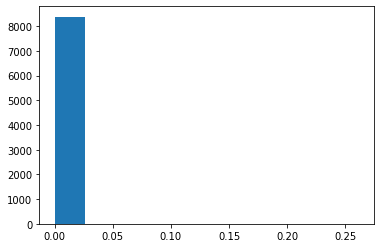

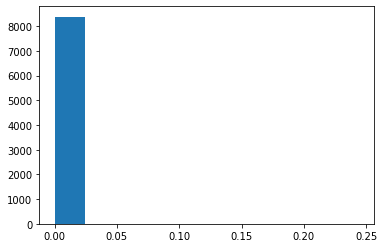

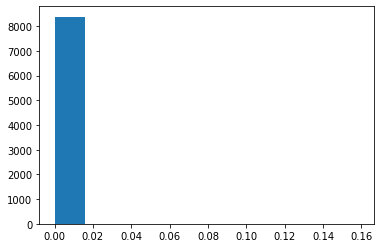

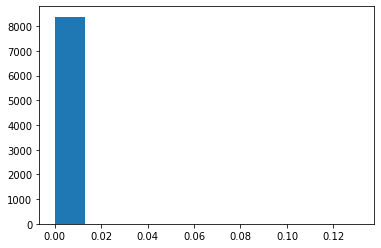

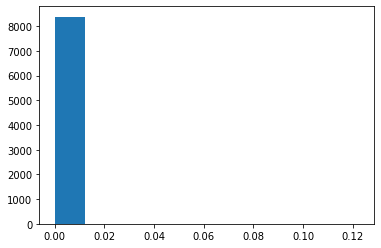

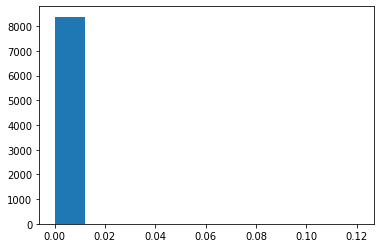

In [36]:
for i in range(k):
    plt.hist(B[:, i])
    plt.show()

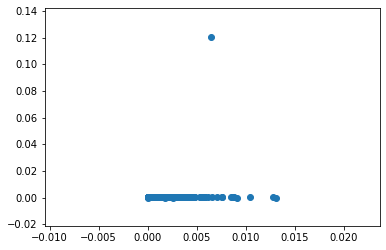

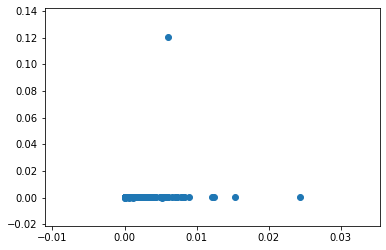

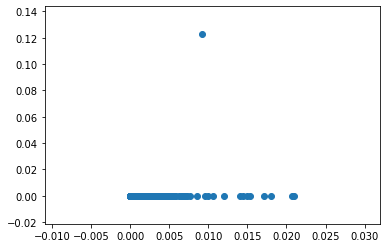

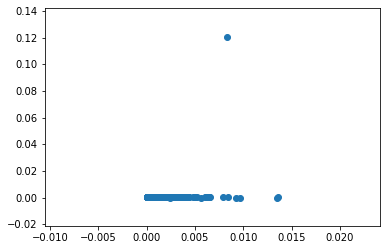

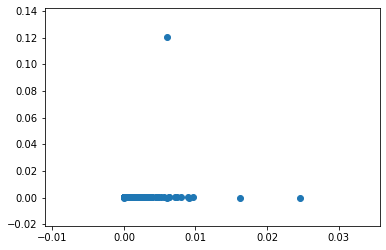

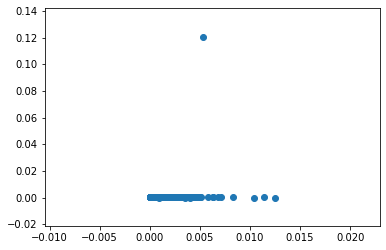

In [26]:
for i in range(k):
    plt.scatter(F[:,i], B[:, topic_idx[i]])
    plt.show()

We cannot find a 1-1 correspondence of topics here. 

Below let's cheat: suppose we observe the true $C = F L^T L F^T$

In [7]:
Ctrue = F @ L. T
Ctrue = Ctrue @ Ctrue.T
Ctrue = Ctrue/Ctrue.sum()

In [8]:
S0, B0, A0, Btilde0, _, _, _, _ = factorizeC(Ctrue, K=k, rectifier='no', optimizer='activeSet')

+ Start rectifying C...
  - Finish rectifying C! [0.000000]
+ Start finding the set of anchor bases S...
[inference.findS] Start finding the set of anchor bases S...
+ Finish finding set S!
  - Discovered 6 basis vectors by [sparsePartial] method.
  - Elapsed time = 2.3352 seconds

  - Finish finding S! [2.335224]
+ Start recovering the object-cluster B...
[inference.recoverB] Start recovering the object-cluster B...
  - 0-th member...
  - 500-th member...
  - 1000-th member...
  - 1500-th member...
  - 2000-th member...
  - 2500-th member...
  - 3000-th member...
  - 3500-th member...
  - 4000-th member...
  - 4500-th member...
  - 5000-th member...
  - 5500-th member...
  - 6000-th member...
  - 6500-th member...
  - 7000-th member...
  - 7500-th member...
  - 8000-th member...
+ Finish recovering B matrix using [activeSet]
  - 6/8382 objects are converged.
  - loss = 5.0904 (By Frobenius norm).
  - Elapsed time = 19.8949 seconds.

  - Finish recovering B! [19.894931]
+ Start recover

In [48]:
A0, _ = recoverA(Ctrue, B0, S0)


[inference.recoverA] Start recovering the cluster-cluster A...
+ Finish recovering A!
  - [diagonal] recovery is used.
  - Elapsed time = 0.0004 seconds.



In [50]:
topic_idx = match_topics(F, B0).astype(int)
topic_idx

array([2, 1, 0, 4, 5, 3])

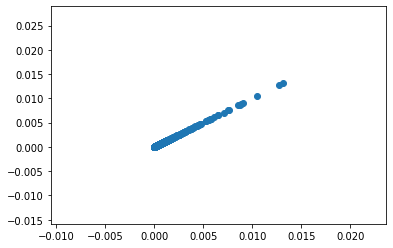

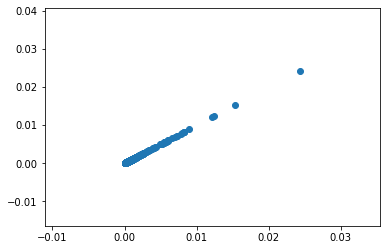

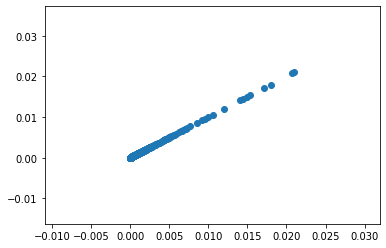

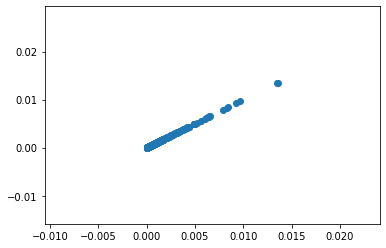

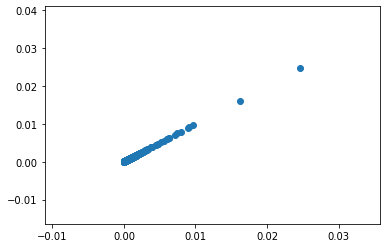

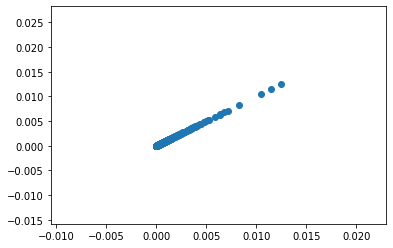

In [21]:
for i in range(k):
    plt.scatter(F[:,i], B0[:, topic_idx[i]])
    plt.show()

Use S0 to estimate $B$

In [19]:
C_rowSums = C.sum(axis = 1)
Cbar = C/C_rowSums[:,None]
B2, _, _ = recoverB(Cbar, C_rowSums, S0, "activeSet")


[inference.recoverB] Start recovering the object-cluster B...
  - 0-th member...
  - 500-th member...
  - 1000-th member...
  - 1500-th member...
  - 2000-th member...
  - 2500-th member...
  - 3000-th member...
  - 3500-th member...
  - 4000-th member...
  - 4500-th member...
  - 5000-th member...
  - 5500-th member...
  - 6000-th member...
  - 6500-th member...
  - 7000-th member...
  - 7500-th member...
  - 8000-th member...
+ Finish recovering B matrix using [activeSet]
  - 6/8382 objects are converged.
  - loss = 2.3692 (By Frobenius norm).
  - Elapsed time = 13.1938 seconds.



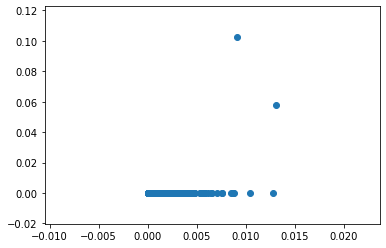

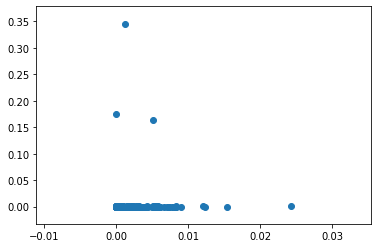

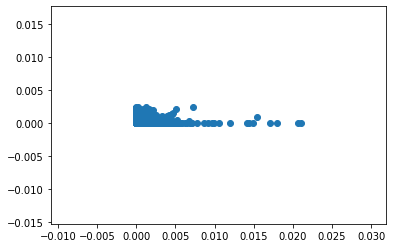

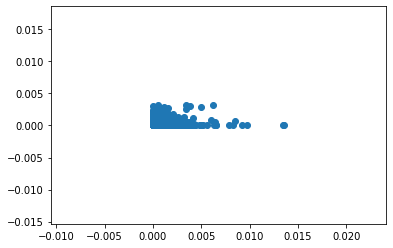

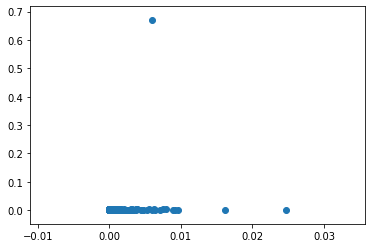

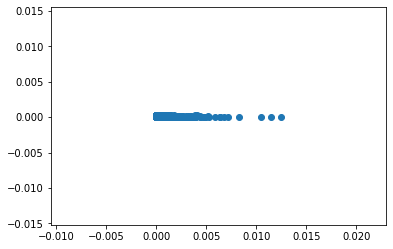

In [38]:
for i in range(k):
    plt.scatter(F[:,i], B2[:, topic_idx[i]])
    plt.show()

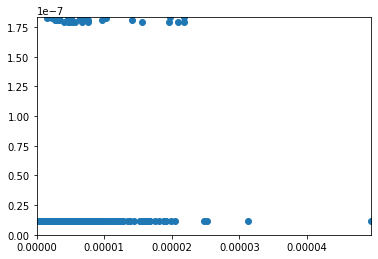

In [53]:
plt.scatter(Ctrue[S0,:].flatten(), C[S0,:].flatten())
plt.xlim((0, Ctrue[S0,:].max()))
plt.ylim((0, C[S0,:].max()))
plt.show()

In [45]:
A.round(3)

array([[0.651, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.683, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.968, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.151, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.225, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.241]])

In [47]:
Atrue = (L.T @ L)/L.shape[0]
Atrue.round(2)

array([[0.11, 0.01, 0.02, 0.02, 0.02, 0.01],
       [0.01, 0.08, 0.02, 0.01, 0.01, 0.01],
       [0.02, 0.02, 0.14, 0.02, 0.02, 0.02],
       [0.02, 0.01, 0.02, 0.12, 0.01, 0.01],
       [0.02, 0.01, 0.02, 0.01, 0.08, 0.01],
       [0.01, 0.01, 0.02, 0.01, 0.01, 0.07]])

In [51]:
A0[np.ix_(topic_idx, topic_idx)].round(3)

array([[0.109, 0.014, 0.024, 0.018, 0.016, 0.006],
       [0.014, 0.084, 0.018, 0.011, 0.01 , 0.008],
       [0.024, 0.018, 0.136, 0.022, 0.016, 0.017],
       [0.018, 0.011, 0.022, 0.115, 0.013, 0.005],
       [0.016, 0.01 , 0.016, 0.013, 0.08 , 0.008],
       [0.006, 0.008, 0.017, 0.005, 0.008, 0.065]])

## Regenerate data with stronger signal

In [56]:
np.random.seed(123)
Xnew,w_idct, F = simulate_multinomial_counts(L, F, 10*X.sum(axis = 1))
Xnew = sparse.coo_matrix(Xnew)

In [59]:
C2, D1, D2 = X2C(Xnew)
S2, B2, A2, _, _, _, _, C2 = factorizeC(C2, K=k, rectifier='AP', optimizer='activeSet')


[file.bows2C] Start constructing dense C...
- Counting the co-occurrence for each document...
+ Finish constructing C and D!
  - The sum of all entries = 1.000000
  - Elapsed Time = 54.3405 seconds
+ Start rectifying C...
+ Start alternating projection
  - 1-th iteration... (2.827698e-05 / 3.997942e-10)
  - 2-th iteration... (7.636340e-09 / 3.997943e-10)
  - 3-th iteration... (5.491299e-09 / 3.997944e-10)
  - 4-th iteration... (4.354758e-09 / 3.997945e-10)
  - 5-th iteration... (3.614624e-09 / 3.997946e-10)
  - 6-th iteration... (3.064501e-09 / 3.997947e-10)
  - 7-th iteration... (2.641194e-09 / 3.997948e-10)
  - 8-th iteration... (2.307126e-09 / 3.997949e-10)
  - 9-th iteration... (2.039720e-09 / 3.997949e-10)
  - 10-th iteration... (1.822071e-09 / 3.997950e-10)
  - 11-th iteration... (1.645485e-09 / 3.997951e-10)
  - 12-th iteration... (1.502239e-09 / 3.997951e-10)
  - 13-th iteration... (1.384046e-09 / 3.997952e-10)
  - 14-th iteration... (1.285016e-09 / 3.997952e-10)
  - 15-th iter

In [60]:
topic_idx = match_topics(F, B2).astype(int)
topic_idx

array([2, 1, 0, 3, 5, 4])

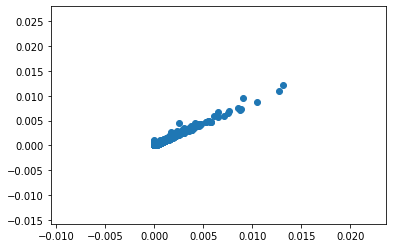

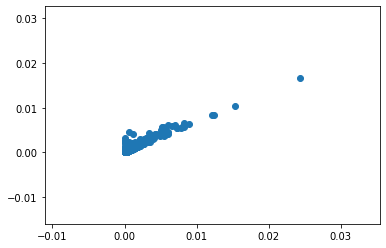

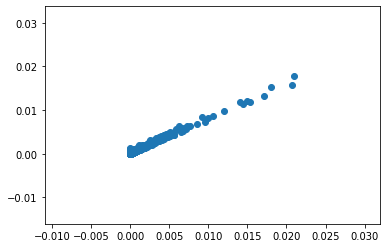

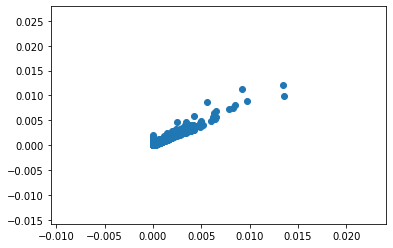

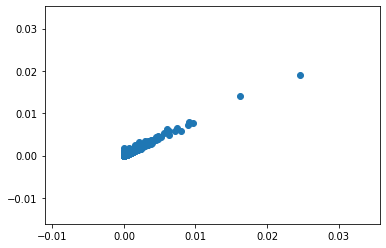

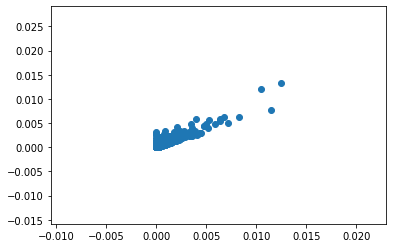

In [61]:
for i in range(k):
    plt.scatter(F[:,i], B2[:, topic_idx[i]])
    plt.show()